In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
%matplotlib inline

In [30]:
base_path = os.path.abspath('./../../../..')
directory = os.path.join(base_path, 'Downloads')

In [31]:
train = pd.read_csv(os.path.join(directory, 'Train_SU63ISt.csv'))
test = pd.read_csv(os.path.join(directory,  'Test_0qrQsBZ.csv'))

In [32]:
train_original=train.copy() 
test_original=test.copy()

In [33]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

In [34]:
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 

In [35]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [36]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [37]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [38]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 

In [39]:
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

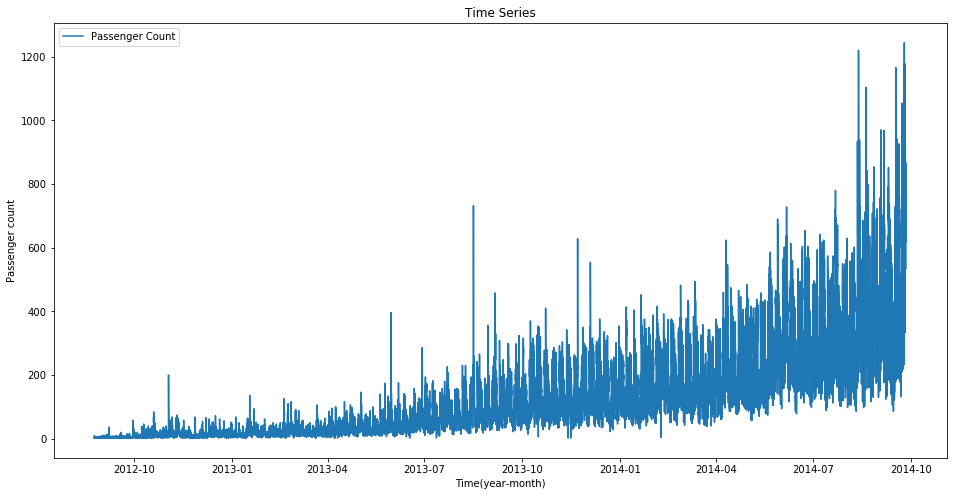

In [62]:
train.index = train['Datetime']
df = train.drop('ID', axis=1)
ts = df['Count']
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

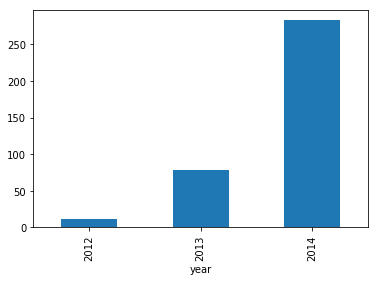

In [63]:
train.groupby('year')['Count'].mean().plot.bar()

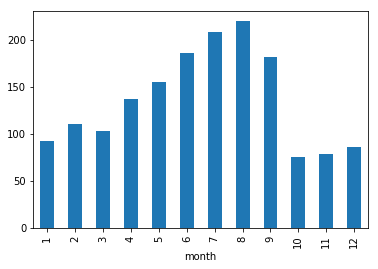

In [64]:
train.groupby('month')['Count'].mean().plot.bar()

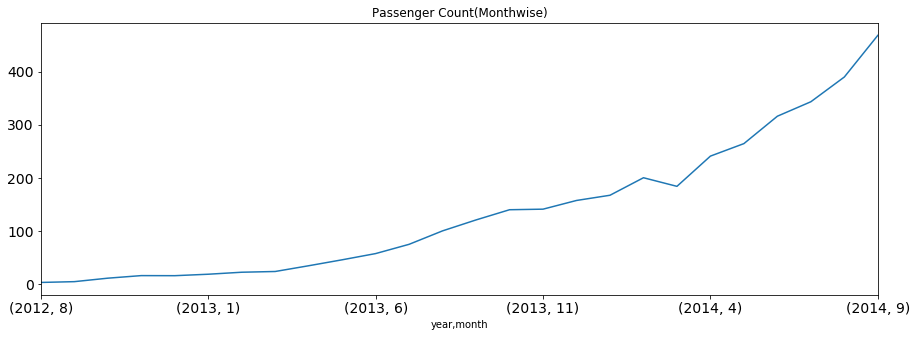

In [65]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

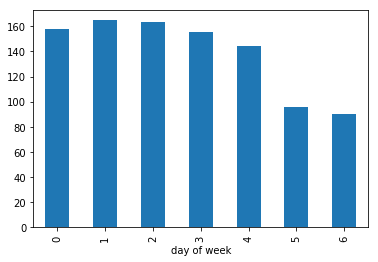

In [66]:
train.groupby(['day of week'])['Count'].mean().plot.bar()

In [40]:
train = train.drop('ID',1)
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


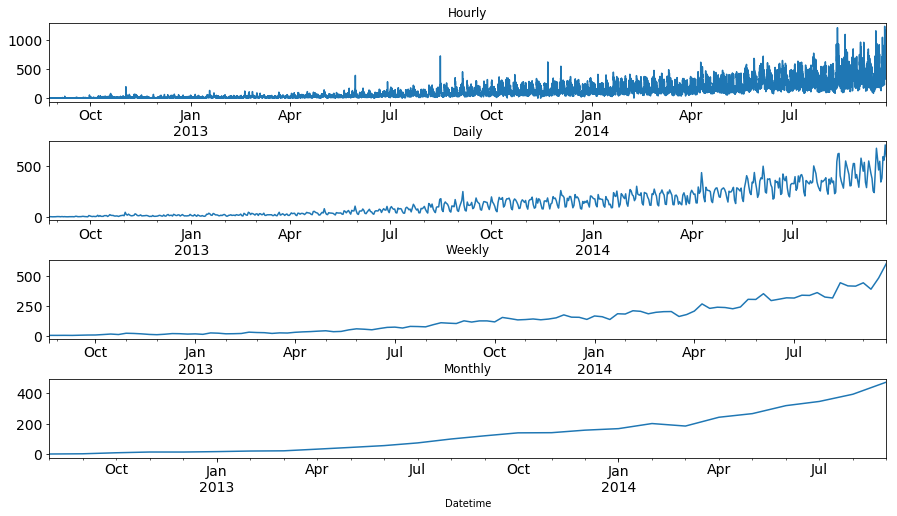

In [41]:
fig, axis = plt.subplots(4, 1)
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.set_figheight(14)
fig.set_figwidth(10)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axis[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axis[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axis[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axis[3]) 

In [42]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [43]:
test = test.resample('D').mean()

In [44]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [45]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


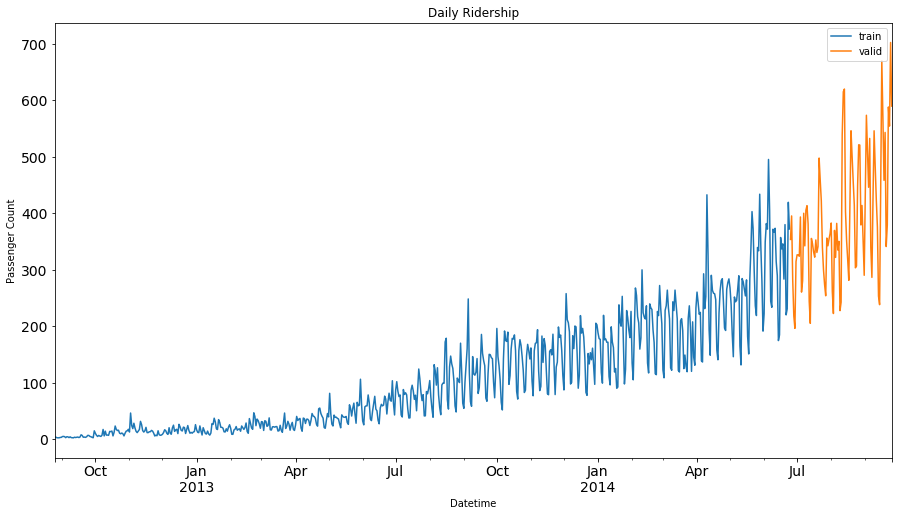

In [46]:
Train.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show()

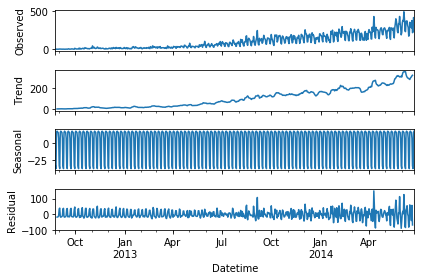

In [47]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

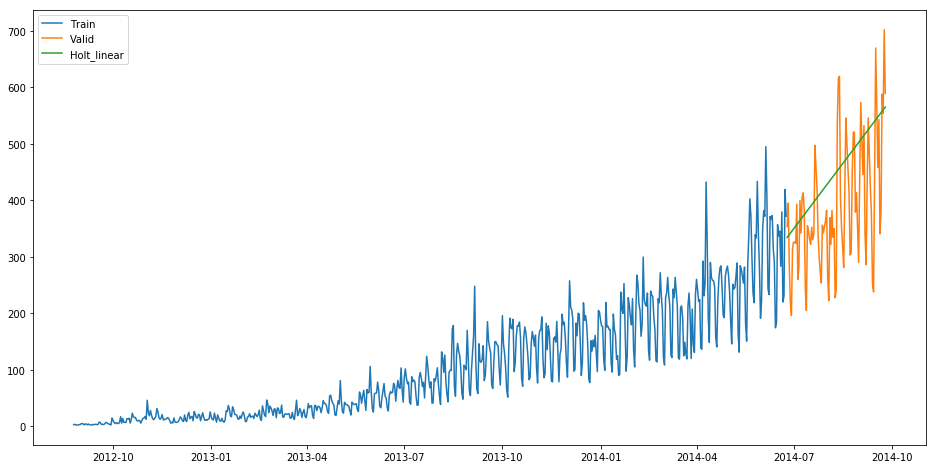

In [49]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()